In [170]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.animation as animation

In [80]:
cop = pd.read_csv(r'C:\Users\Shan\Dropbox\Shan-for-Chesler\Galvanize\Pandas\CCRB-Complaint-Data_202007261025\allegations_20200726939.csv', delimiter = ',', header = 0)

In [81]:
cop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33358 entries, 0 to 33357
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   unique_mos_id             33358 non-null  int64  
 1   first_name                33358 non-null  object 
 2   last_name                 33358 non-null  object 
 3   command_now               33358 non-null  object 
 4   complaint_id              33358 non-null  int64  
 5   month_received            33358 non-null  int64  
 6   year_received             33358 non-null  int64  
 7   month_closed              33358 non-null  int64  
 8   year_closed               33358 non-null  int64  
 9   command_at_incident       31814 non-null  object 
 10  rank_abbrev_incident      33358 non-null  object 
 11  rank_abbrev_now           33358 non-null  object 
 12  rank_now                  33358 non-null  object 
 13  rank_incident             33358 non-null  object 
 14  mos_et

,unique_mos_id,complaint_id,month_received,year_received,month_closed,year_closed,mos_age_incident,complainant_age_incident,precinct
count,33358.000000,33358.000000,33358.000000,33358.000000,33358.000000,33358.000000,33358.000000,28546.000000,33334.000000
mean,18169.912495,23905.058217,6.323551,2010.726782,6.470772,2011.525661,32.346873,32.484201,64.365213
std,9566.316896,11954.434138,3.362951,6.034725,3.343372,6.085907,6.040944,28.408963,31.451592
min,2.000000,517.000000,1.000000,1985.000000,1.000000,1985.000000,20.000000,-4301.000000,0.000000
25%,9671.000000,13684.750000,3.000000,2007.000000,4.000000,2008.000000,28.000000,23.000000,43.000000
50%,19215.000000,25132.000000,6.000000,2012.000000,6.000000,2013.000000,31.000000,30.000000,67.000000
75%,25412.000000,34252.000000,9.000000,2016.000000,9.000000,2016.000000,36.000000,41.000000,81.000000
max,36374.000000,43703.000000,12.000000,2020.000000,12.000000,2020.000000,60.000000,101.000000,1000.000000


In [12]:
cop.columns

Index(['unique_mos_id', 'first_name', 'last_name', 'command_now',
       'complaint_id', 'month_received', 'year_received', 'month_closed',
       'year_closed', 'command_at_incident', 'rank_abbrev_incident',
       'rank_abbrev_now', 'rank_now', 'rank_incident', 'mos_ethnicity',
       'mos_gender', 'mos_age_incident', 'complainant_ethnicity',
       'complainant_gender', 'complainant_age_incident', 'fado_type',
       'allegation', 'precinct', 'contact_reason', 'outcome_description',
       'board_disposition'],
      dtype='object')

In [197]:
pre = cop.groupby('precinct') 
pre.mean().round(0)

,unique_mos_id,complaint_id,month_received,year_received,month_closed,year_closed,mos_age_incident,complainant_age_incident
precinct,,,,,,,,
0.0,22245.0,2571.0,5.0,1996.0,5.0,1997.0,29.0,33.0
1.0,16131.0,27409.0,8.0,2012.0,6.0,2013.0,33.0,36.0
5.0,14761.0,26702.0,6.0,2012.0,7.0,2013.0,34.0,31.0
6.0,15096.0,27280.0,6.0,2012.0,7.0,2013.0,33.0,40.0
7.0,16037.0,24248.0,6.0,2011.0,6.0,2012.0,33.0,31.0
...,...,...,...,...,...,...,...,...
120.0,20306.0,25767.0,6.0,2012.0,6.0,2013.0,32.0,32.0
121.0,20201.0,33019.0,6.0,2015.0,7.0,2016.0,33.0,34.0
122.0,20639.0,22924.0,7.0,2010.0,7.0,2011.0,33.0,33.0


In [72]:
####TA= TOTAL ALLEGATIONS BY TYPE

In [73]:
ta = cop.allegation.value_counts()
ta

Physical force                   4849
Word                             3942
Stop                             2300
Search (of person)               2047
Frisk                            1926
                                 ... 
Gun Fired                           2
Oriental                            1
Sexist Remark                       1
Questioned immigration status       1
Other Asian                         1
Name: allegation, Length: 115, dtype: int64

In [74]:
#### PA = Allegation Count Per Precinct

In [70]:
pa = pre['allegation'].value_counts()
pa

precinct  allegation          
0.0       Other - Force           4
          Curse                   3
          Nasty Words             2
          Push/Shove              2
          Threat of force         2
                                 ..
123.0     Strip-searched          1
          Threat of force         1
          Threat to notify ACS    1
1000.0    Word                    2
          Action                  1
Name: allegation, Length: 3820, dtype: int64

In [193]:
pa_type = pre['fado_type'].value_counts()
pa_type

precinct  fado_type         
0.0       Force                  8
          Abuse of Authority     7
          Discourtesy            6
1.0       Abuse of Authority    84
          Force                 54
                                ..
123.0     Abuse of Authority    88
          Discourtesy           15
          Force                  6
          Offensive Language     3
1000.0    Discourtesy            3
Name: fado_type, Length: 310, dtype: int64

In [82]:
# df = px.data.gapminder().query("year==2007")
# fig = px.scatter_geo(df, locations="iso_alpha", color="continent",
#                      hover_name="country", size="pop",
#                      projection="natural earth")
# fig.show()

In [87]:
cop.columns

Index(['unique_mos_id', 'first_name', 'last_name', 'command_now',
       'complaint_id', 'month_received', 'year_received', 'month_closed',
       'year_closed', 'command_at_incident', 'rank_abbrev_incident',
       'rank_abbrev_now', 'rank_now', 'rank_incident', 'mos_ethnicity',
       'mos_gender', 'mos_age_incident', 'complainant_ethnicity',
       'complainant_gender', 'complainant_age_incident', 'fado_type',
       'allegation', 'precinct', 'contact_reason', 'outcome_description',
       'board_disposition'],
      dtype='object')

In [ ]:
#### Function to determine borough per allegation 
# separated boroughs base don date here http://wgetsnaps.github.io/nyc.gov--nypd-videos/html/nypd/html/home/precincts.shtml

In [104]:
def pre_bor(precinct):
    if precinct <= 39:
        return "Manhattan"
    elif precinct >= 40 and precinct < 59:
        return "Bronx"
    elif precinct >=60 and precinct < 99:
        return "Brooklyn"
    elif precinct >= 100 and precinct < 119:
        return "Queens"
    elif precinct >= 120 and precinct < 125:
        return "Staten Island"
    else:
        return "unknown"
pre_bor(50)

'Bronx'

In [119]:
cop['borough'] = np.vectorize(pre_bor)(cop['precinct'])

In [124]:
cop.tail(50)

,unique_mos_id,first_name,last_name,command_now,complaint_id,month_received,year_received,month_closed,year_closed,command_at_incident,...,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition,borough
33308,9856,Daniel,Zollo,077 PCT,17560,2,2009,12,2009,077 PCT,...,Black,Male,25.0,Force,Physical force,77.0,Parking violation,Arrest - other violation/crime,Exonerated,Brooklyn
33309,9856,Daniel,Zollo,077 PCT,17848,3,2009,2,2010,077 PCT,...,Black,Male,49.0,Abuse of Authority,Stop,77.0,PD suspected C/V of violation/crime - street,Arrest - disorderly conduct,Unsubstantiated,Brooklyn
33310,9856,Daniel,Zollo,077 PCT,18754,8,2009,7,2010,077 PCT,...,Black,Male,28.0,Abuse of Authority,Retaliatory summons,77.0,PD suspected C/V of violation/crime - street,Summons - disorderly conduct,Substantiated (Charges),Brooklyn
33311,9856,Daniel,Zollo,077 PCT,19009,9,2009,8,2010,077 PCT,...,NaN,NaN,NaN,Abuse of Authority,Premises entered and/or searched,77.0,PD suspected C/V of violation/crime - bldg,Summons - other violation/crime,Substantiated (Command Discipline),Brooklyn
33312,9856,Daniel,Zollo,077 PCT,20709,6,2010,4,2011,077 PCT,...,Black,Male,47.0,Abuse of Authority,Stop,77.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Unsubstantiated,Brooklyn
33313,9856,Daniel,Zollo,077 PCT,20709,6,2010,4,2011,077 PCT,...,Black,Male,47.0,Abuse of Authority,Vehicle search,77.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Unsubstantiated,Brooklyn
33314,9856,Daniel,Zollo,077 PCT,20709,6,2010,4,2011,077 PCT,...,Black,Male,47.0,Abuse of Authority,Frisk,77.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Exonerated,Brooklyn
33315,9856,Daniel,Zollo,077 PCT,20709,6,2010,4,2011,077 PCT,...,Black,Male,47.0,Abuse of Authority,Search (of person),77.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Unsubstantiated,Brooklyn
33316,9856,Daniel,Zollo,077 PCT,20786,6,2010,4,2011,077 PCT,...,Black,Female,46.0,Abuse of Authority,Refusal to process civilian complaint,77.0,Other,Arrest - other violation/crime,Unsubstantiated,Brooklyn
33317,9856,Daniel,Zollo,077 PCT,20786,6,2010,4,2011,077 PCT,...,Black,Male,39.0,Abuse of Authority,Threat of force (verbal or physical),77.0,Other,Arrest - other violation/crime,Unsubstantiated,Brooklyn


In [148]:
c=cop.precinct.value_counts()
c
#shows the top 5 most offending precincts by way of precinct appearance in database

75.0      2172
73.0      1163
44.0      1139
46.0      1120
67.0      1119
          ... 
17.0        76
111.0       37
0.0         21
22.0        12
1000.0       3
Name: precinct, Length: 79, dtype: int64

In [185]:
cop.dtypes

unique_mos_id                 int64
first_name                   object
last_name                    object
command_now                  object
complaint_id                  int64
month_received                int64
year_received                 int32
month_closed                  int64
year_closed                   int64
command_at_incident          object
rank_abbrev_incident         object
rank_abbrev_now              object
rank_now                     object
rank_incident                object
mos_ethnicity                object
mos_gender                   object
mos_age_incident              int64
complainant_ethnicity        object
complainant_gender           object
complainant_age_incident    float64
fado_type                    object
allegation                   object
precinct                    float64
contact_reason               object
outcome_description          object
board_disposition            object
borough                      object
dtype: object

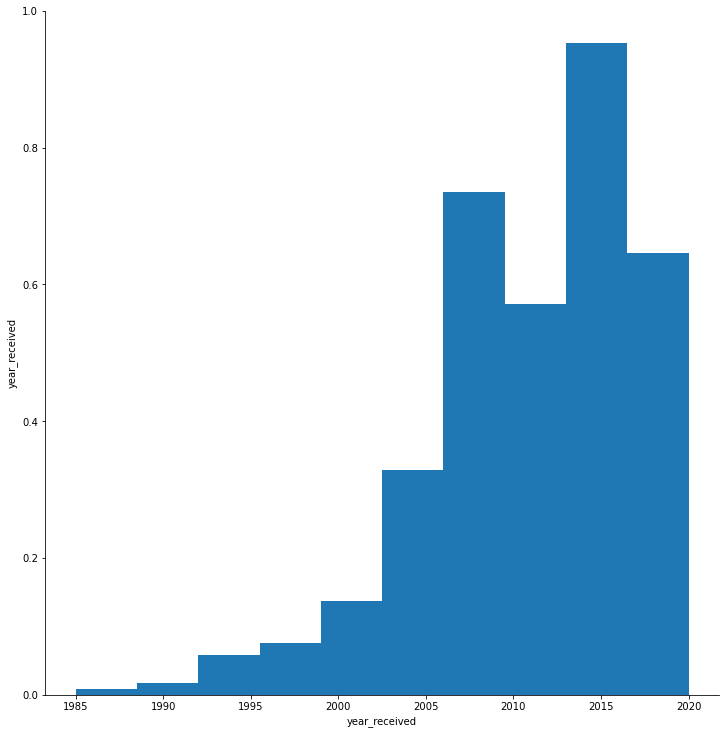

In [252]:
sns.pairplot(cop[['allegation','year_received']], plot_kws = {"color": "green"}, height = 10)

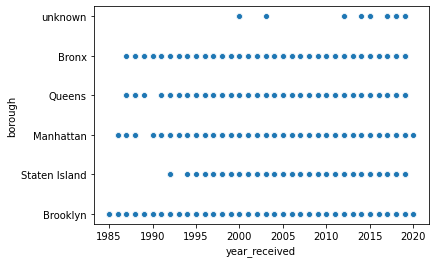

In [244]:
ax = sns.scatterplot(x = 'year_received', y = 'borough', data = cop, palette = ["red", "green", "blue", "hotpink", "teal", "yellow"], ci = False) 

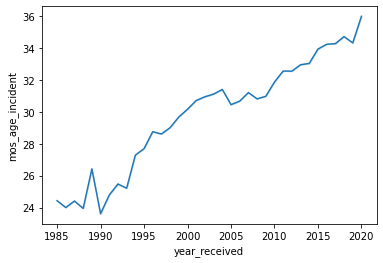

In [232]:
ax = sns.lineplot(x = 'year_received', y = 'mos_age_incident', data = cop, palette = ["red", "green", "blue", "hotpink"], ci = False)


In [225]:
# cop['Complete_Date_Received'] = pd.to_datetime(cop[['month_received', 'year_received', 'month_received']])

In [219]:
boro = cop.borough.value_counts()
boro

Brooklyn         12755
Bronx             8329
Manhattan         6011
Queens            4676
Staten Island     1560
unknown             27
Name: borough, dtype: int64

In [268]:
sns.displot(c)

AttributeError: module 'seaborn' has no attribute 'displot'